In [1]:
# importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Set Random seed for reproducibility
np.random.seed(10)

In [3]:
# importing the data

root = '../Data/'

df1 = pd.read_csv(root+'dropout-ratio-2012-2015.csv').replace('NR', 0)
df1 = df1.replace('Uppe_r_Primary', 0)
df1 = df1[df1['year']!='2012-13']

df1[['Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total']] = df1[['Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total']].astype('float64', inplace=True)

df2 = pd.read_csv(root+'gross-enrollment-ratio-2013-2016.csv').replace('NR', 0)
df2 = df2.replace('@', 0)
df2 = df2[df2['Year']!='2012-13']
df2[['Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total']] = df2[['Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total']].astype('float64', inplace=True)

df3 = pd.read_csv(root+'percentage-of-schools-with-comps-2013-2016.csv').replace('NR', 0)
df3 = df3[df3['year']!='2015-16']
df3[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']] = df3[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']].astype('float64', inplace=True)

df4 = pd.read_csv(root+'percentage-of-schools-with-electricity-2013-2016.csv').replace('NR', 0)
df4 = df4[df4['year']!='2015-16']
df4[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']] = df4[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']].astype('float64', inplace=True)

df5 = pd.read_csv(root+'percentage-of-schools-with-water-facility-2013-2016.csv').replace('NR', 0)
df5 = df5[df5['Year']!='2015-16']
df5[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']] = df5[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']].astype('float64', inplace=True)

df6 = pd.read_csv(root+'schools-with-boys-toilet-2013-2016.csv').replace('NR', 0)
df6 = df6[df6['year']!='2015-16']
df6[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']] = df6[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']].astype('float64', inplace=True)

df7 = pd.read_csv(root+'schools-with-girls-toilet-2013-2016.csv').replace('NR', 0)
df7 = df7[df7['year']!='2015-16']
df7[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']] = df7[['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']].astype('float64', inplace=True)

In [4]:
df5.columns = ['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools']

In [5]:
df5.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.0,100.0,0.00,99.52
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.5,100.0,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.0,100.0,98.37,93.74
6,Arunachal Pradesh,2013-14,72.32,89.46,100.00,95.35,94.00,95.54,100.00,0.0,100.0,100.00,79.79


In [6]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 108
Data columns (total 13 columns):
State_UT                            73 non-null object
year                                73 non-null object
Primary_Only                        73 non-null float64
Primary_with_U_Primary              73 non-null float64
Primary_with_U_Primary_Sec_HrSec    73 non-null float64
U_Primary_Only                      73 non-null float64
U_Primary_With_Sec_HrSec            73 non-null float64
Primary_with_U_Primary_Sec          73 non-null float64
U_Primary_With_Sec                  73 non-null float64
Sec_Only                            73 non-null float64
Sec_with_HrSec.                     73 non-null float64
HrSec_Only                          73 non-null float64
All Schools                         73 non-null float64
dtypes: float64(11), object(2)
memory usage: 8.0+ KB


In [7]:
df1.describe()

,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,4.216351,3.923378,4.070676,3.687297,4.207568,3.914595,17.830405,16.682027,17.287432,7.307703,5.298378,6.314324
std,4.446678,4.400263,4.406536,3.094294,3.206942,3.081115,8.132796,8.901735,8.412856,7.793621,5.799426,6.788901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.585000,0.597500,0.677500,1.230000,2.005000,1.715000,12.050000,9.475000,11.905000,0.317500,0.000000,0.117500
50%,2.860000,2.290000,2.590000,3.365000,3.635000,3.775000,16.850000,15.705000,15.890000,6.105000,4.015000,5.125000
75%,6.405000,5.855000,6.260000,5.255000,5.372500,5.522500,23.342500,23.110000,23.345000,12.385000,8.402500,9.762500
max,19.090000,19.740000,19.410000,18.080000,17.630000,17.860000,49.390000,49.570000,49.480000,44.380000,36.050000,40.480000


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 14 columns):
State_UT                  110 non-null object
Year                      110 non-null object
Primary_Boys              110 non-null float64
Primary_Girls             110 non-null float64
Primary_Total             110 non-null float64
Upper_Primary_Boys        110 non-null float64
Upper_Primary_Girls       110 non-null float64
Upper_Primary_Total       110 non-null float64
Secondary_Boys            110 non-null float64
Secondary_Girls           110 non-null float64
Secondary_Total           110 non-null float64
Higher_Secondary_Boys     110 non-null float64
Higher_Secondary_Girls    110 non-null float64
Higher_Secondary_Total    110 non-null float64
dtypes: float64(12), object(2)
memory usage: 12.9+ KB


In [9]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis =1, keys=['Dropout', 'GrossEnrollment', 'SchoolswithComp', 'SchoolswithElec', 'SchoolwithWF', 'SchoolswithBT', 'SchoolswithGT'])

In [10]:
data.head()

Dropout                                                    \
         State_UT     year Primary_Boys Primary_Girls Primary_Total   
0             NaN      NaN          NaN           NaN           NaN   
1   A & N Islands  2013-14         1.35          1.06          1.21   
2   A & N Islands  2014-15         0.47          0.55          0.51   
3             NaN      NaN          NaN           NaN           NaN   
4  Andhra Pradesh  2013-14         4.31          4.39          4.35   

                                                                              \
  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys   
0                NaN                 NaN                 NaN             NaN   
1               0.00                1.54                0.51            8.36   
2               1.44                1.95                1.69           11.47   
3                NaN                 NaN                 NaN             NaN   
4               3.46                4.12                3.78           11.95   

                                                                        \
  Secondary _Girls Secondary _Total HrSecondary_Boys HrSecondary_Girls   
0              NaN              NaN              NaN               NaN   
1             5.98             7.20            18.94             12.20   
2             8.16             9.87            21.05             12.21   
3              NaN              NaN              NaN               NaN   
4            13.37            12.65            12.65             10.85   

                               GrossEnrollment                        \
  HrSecondary_Total                   State_UT     Year Primary_Boys   
0               NaN  Andaman & Nicobar Islands  2013-14        95.88   
1             15.87             Andhra Pradesh  2013-14        96.62   
2             16.93          Arunachal Pradesh  2013-14       129.12   
3               NaN                      Assam  2013-14       111.77   
4             11.79                      Bihar  2013-14        95.03   

                                                                      \
  Primary_Girls Primary_Total Upper_Primary_Boys Upper_Primary_Girls   
0         91.97         93.93              94.70               88.98   
1         96.87         96.74              82.81               84.38   
2        127.77        128.46             112.64              115.27   
3        115.16        113.43              87.85               98.69   
4        101.15         97.96              80.60               94.92   

                                                                      \
  Upper_Primary_Total Secondary_Boys Secondary_Girls Secondary_Total   
0               91.83         102.89           97.36          100.16   
1               83.57          73.76           76.77           75.20   
2              113.94          88.37           84.89           86.65   
3               93.13          65.60           77.20           71.21   
4               87.24          57.66           62.96           60.08   

                                                                       \
  Higher_Secondary_Boys Higher_Secondary_Girls Higher_Secondary_Total   
0                105.40                  96.61                 101.28   
1                 59.83                  60.83                  60.30   
2                 65.16                  65.38                  65.27   
3                 31.78                  34.27                  32.94   
4                 23.33                  24.17                  23.70   

             SchoolswithComp                                               \
                    State_UT     year Primary_Only Primary_with_U_Primary   
0  Andaman & Nicobar Islands  2013-14        30.40                  73.68   
1  Andaman & Nicobar Islands  2014-15        30.94                  76.54   
2                        NaN      NaN          NaN                    NaN   
3             Andhra

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 93 columns):
(Dropout, State_UT)                                    74 non-null object
(Dropout, year)                                        74 non-null object
(Dropout, Primary_Boys)                                74 non-null float64
(Dropout, Primary_Girls)                               74 non-null float64
(Dropout, Primary_Total)                               74 non-null float64
(Dropout, Upper Primary_Boys)                          74 non-null float64
(Dropout, Upper Primary_Girls)                         74 non-null float64
(Dropout, Upper Primary_Total)                         74 non-null float64
(Dropout, Secondary _Boys)                             74 non-null float64
(Dropout, Secondary _Girls)                            74 non-null float64
(Dropout, Secondary _Total)                            74 non-null float64
(Dropout, HrSecondary_Boys)                            74 non-null float

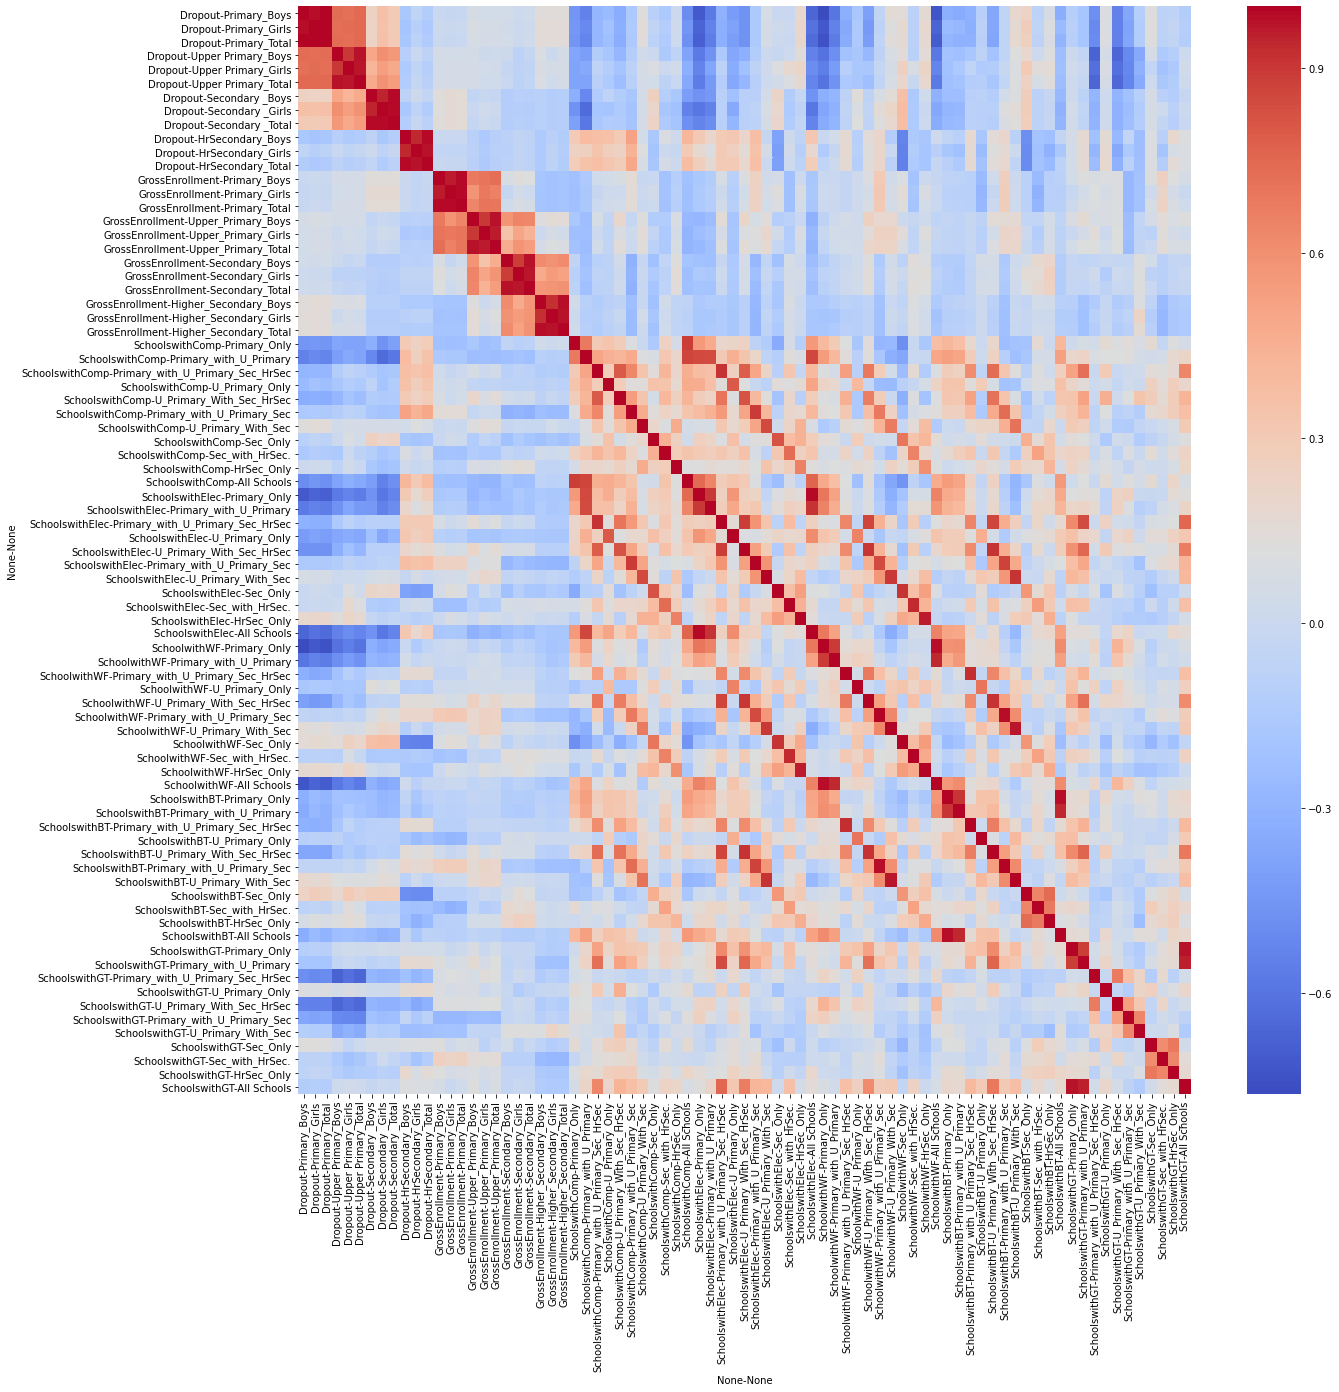

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='coolwarm')

# Noticed Trends with Drop Out Rate

- Schools with computers has an inverse relationship with the dropout rate (most effect for primary, upper primary, less effect for secondary and very much less for high secondary)
- Schools with electricity has an inverse relationship with the drop out rate (most effect for primary, upper primary, less effect for secondary and very much less for high secondary)
- Schools with water facilities has an inverse relationship with the drop out rate (most effect for primary, upper primary, less effect for secondary and very much less for high secondary)
- schools with Boys and girls toilet also showed an slight inverse relationship with the dropout rate (most effect for primary, upper primary, much less effect for secondary and very much less for high secondary)

# Noticed trends with Enrollment Rate

- The are no obvious correlations between the enrollment rate and the other datasets
- Features which contribute highly to this such as tuition fees, closeness to neighbourhoods, ranking etc are not included in the data we collected

In [13]:
# creating a clean new dataframe
data = pd.concat([df3,df4,df5], axis =1, keys=['SchoolswithComp', 'SchoolswithElec', 'SchoolwithWF'])

In [14]:
data

SchoolswithComp                                               \
                      State_UT     year Primary_Only Primary_with_U_Primary   
0    Andaman & Nicobar Islands  2013-14        30.40                  73.68   
1    Andaman & Nicobar Islands  2014-15        30.94                  76.54   
3               Andhra Pradesh  2013-14        12.73                  42.72   
4               Andhra Pradesh  2014-15        10.29                  44.15   
6            Arunachal Pradesh  2013-14         4.32                  45.05   
7            Arunachal Pradesh  2014-15         4.06                  43.83   
9                        Assam  2013-14         1.08                  29.12   
10                       Assam  2014-15         1.13                  30.75   
12                       Bihar  2013-14         1.42                   7.61   
13                       Bihar  2014-15         2.29                  11.15   
15                  Chandigarh  2013-14        54.55                  92.31   
16                  Chandigarh  2014-15        45.45                  93.10   
18                Chhattisgarh  2013-14         2.64                  36.63   
19                Chhattisgarh  2014-15         3.30                  41.44   
21        Dadra & Nagar Haveli  2013-14         8.84                  66.94   
22        Dadra & Nagar Haveli  2014-15         7.39                  69.29   
24                 Daman & Diu  2013-14        14.55                  88.89   
25                 Daman & Diu  2014-15        21.67                  80.00   
27                       Delhi  2013-14        80.55                  91.82   
28                       Delhi  2014-15        79.65                  92.41   
30                         Goa  2013-14        12.02                  89.66   
31                         Goa  2014-15        13.62                  81.82   
33                     Gujarat  2013-14        24.74                  90.44   
34                     Gujarat  2014-15        28.28                  90.99   
36                     Haryana  2013-14         7.43                  74.87   
37                     Haryana  2014-15         7.47                  77.03   
39            Himachal Pradesh  2013-14         3.75                  82.75   
40            Himachal Pradesh  2014-15         4.30                  80.51   
42           Jammu And Kashmir  2013-14         3.60                  18.94   
43           Jammu And Kashmir  2014-15         3.74                  19.80   
45                   Jharkhand  2013-14         3.10                  10.89   
46                   Jharkhand  2014-15         3.25                  12.14   
48                   Karnataka  2013-14         9.94                  40.01   
49                   Karnataka  2014-15        13.20                  43.71   
51                      Kerala  2013-14        87.96                  96.61   
52                      Kerala  2014-15        89.64                  97.21   
54                 Lakshadweep  2013-14       100.00                 100.00   
55                 Lakshadweep  2014-15       100.00                 100.00   
57              Madhya Pradesh  2013-14         3.33                  46.61   
58              Madhya Pradesh  2014-15         3.53                  49.50   
60                 Maharashtra  2013-14        28.60                  69.20   
61                 Maharashtra  2014-15        32.52                  72.86   
63                     Manipur  2013-14         2.13                  36.23   
64                     Manipur  2014-15         1.82                  36.60   
66                   Meghalaya  2013-14         2.97                  28.57   
67                   Meghalaya  2014-15         3.23                  36.18   
69                     Mizoram  2013-14         9.21                  53.92   
70                     Mizoram  2014-15         8.31                  49.87   
72                    Nagaland  2013-14         4.98             

In [15]:
# Feature Engineering
# dropout dataset

df1['All_Schools'] = df1['Primary_Total'] + df1['Upper Primary_Total'] + df1['Secondary _Total'] + df1['HrSecondary_Total']

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1 to 109
Data columns (total 15 columns):
State_UT               74 non-null object
year                   74 non-null object
Primary_Boys           74 non-null float64
Primary_Girls          74 non-null float64
Primary_Total          74 non-null float64
Upper Primary_Boys     74 non-null float64
Upper Primary_Girls    74 non-null float64
Upper Primary_Total    74 non-null float64
Secondary _Boys        74 non-null float64
Secondary _Girls       74 non-null float64
Secondary _Total       74 non-null float64
HrSecondary_Boys       74 non-null float64
HrSecondary_Girls      74 non-null float64
HrSecondary_Total      74 non-null float64
All_Schools            74 non-null float64
dtypes: float64(13), object(2)
memory usage: 11.8+ KB


In [17]:
df1

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,All_Schools
1,A & N Islands,2013-14,1.35,1.06,1.21,0.00,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87,24.79
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,29.00
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,32.57
5,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.20,15.81,15.60,15.71,0.00,0.00,0.00,27.63
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07,48.04
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42,53.06
10,Assam,2013-14,8.19,6.68,7.44,7.60,6.54,7.05,28.59,32.10,30.43,7.62,6.83,7.24,52.16
11,Assam,2014-15,16.07,14.65,15.36,10.45,10.56,10.51,24.64,29.28,27.06,0.00,0.00,0.00,52.93
13,Bihar,2013-14,2.38,1.79,2.09,2.77,3.19,2.98,24.67,26.05,25.33,0.00,0.00,0.00,30.40
14,Bihar,2014-15,0.35,0.00,0.00,4.14,4.01,4.08,25.21,26.62,25.90,0.00,0.00,0.00,29.98


In [18]:
#Extracting testing and training data

train = data.copy()
test = df1.drop(94, axis=0)['All_Schools']

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 108
Data columns (total 39 columns):
(SchoolswithComp, State_UT)                            73 non-null object
(SchoolswithComp, year)                                73 non-null object
(SchoolswithComp, Primary_Only)                        73 non-null float64
(SchoolswithComp, Primary_with_U_Primary)              73 non-null float64
(SchoolswithComp, Primary_with_U_Primary_Sec_HrSec)    73 non-null float64
(SchoolswithComp, U_Primary_Only)                      73 non-null float64
(SchoolswithComp, U_Primary_With_Sec_HrSec)            73 non-null float64
(SchoolswithComp, Primary_with_U_Primary_Sec)          73 non-null float64
(SchoolswithComp, U_Primary_With_Sec)                  73 non-null float64
(SchoolswithComp, Sec_Only)                            73 non-null float64
(SchoolswithComp, Sec_with_HrSec.)                     73 non-null float64
(SchoolswithComp, HrSec_Only)                          73 non-null float6

In [20]:
train.shape, test.shape

((73, 39), (73,))

In [21]:
# Reseting index
train.reset_index(inplace=True, drop=True)
test = test.reset_index(drop=True)

In [22]:
test.head()

0    24.79
1    29.00
2    32.57
3    27.63
4    48.04
Name: All_Schools, dtype: float64

In [23]:
train.isna().sum()

SchoolswithComp  State_UT                            0
                 year                                0
                 Primary_Only                        0
                 Primary_with_U_Primary              0
                 Primary_with_U_Primary_Sec_HrSec    0
                 U_Primary_Only                      0
                 U_Primary_With_Sec_HrSec            0
                 Primary_with_U_Primary_Sec          0
                 U_Primary_With_Sec                  0
                 Sec_Only                            0
                 Sec_with_HrSec.                     0
                 HrSec_Only                          0
                 All Schools                         0
SchoolswithElec  State_UT                            0
                 year                                0
                 Primary_Only                        0
                 Primary_with_U_Primary              0
                 Primary_with_U_Primary_Sec_HrSec    0
          

In [24]:
# splitting the data

from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in ss.split(train, train['SchoolswithComp']['year']):
    
    train = train.drop(['State_UT', 'year'], axis=1, level=1)
    # Normalising the training data
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    train = scaler.fit_transform(train)
    
    X_train, X_test = train[train_index], train[test_index]
    y_train, y_test = test.iloc[train_index], test.iloc[test_index]

# Creating a decision Tree Regressor model

In [25]:
tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
pred = tree.predict(X_test)

In [27]:
print(r2_score(y_test, pred), '\n')
print(np.sqrt(mean_squared_error(y_test, pred)), '\n')
#print(roc_auc_score(y_test, pred), '\n')

-1.0064448876325884 

24.95986151136794 



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

print(r2_score(y_test, pred2), '\n')
print(np.sqrt(mean_squared_error(y_test, pred2)), '\n')

0.07489545044793489 

16.94821490074987 



# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor, ridge_regression, Lars

lg = RandomForestRegressor(n_estimators=100)
lg.fit(X_train, y_train)
pred3 = lg.predict(X_test)

print(r2_score(y_test, pred3), '\n')
print(np.sqrt(mean_squared_error(y_test, pred3)), '\n')

0.11092052572636713 

16.614942620203855 



# XGBOOST

In [37]:
from xgboost import XGBRegressor, XGBRFRegressor

xg = XGBRegressor()
xg.fit(X_train, y_train)
pred4 = xg.predict(X_test)

print(r2_score(y_test, pred4), '\n')
print(np.sqrt(mean_squared_error(y_test, pred4)), '\n')

[19:19:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.10189246252388517 

16.699086887336414 



C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


# SGD Regressor

In [39]:
sg = SGDRegressor()
sg.fit(X_train, y_train)
pred5 = sg.predict(X_test)

print(r2_score(y_test, pred5), '\n')
print(np.sqrt(mean_squared_error(y_test, pred5)), '\n')

0.12364870553636476 

16.495583025894376 



# The data we have is not sufficient to build a machine learning model. 

- The data is inefficent
- My recommendation to the data collecting organisation is to get more meaningful features
- Sgd regressor performed best with a root mean squared error of 16.49 and a R- Square score of 0.124
- Features such as average wage in each of the state_ut, closeness to living quaters, number of students in a class, number of teachers in the school etc.